# Train model

In [1]:
# https://www.curiousily.com/posts/object-detection-on-custom-dataset-with-yolo-v5-using-pytorch-and-python/
#! config/download_weights.sh
#! python create_yolo_dataset_files.py

In [2]:
from main import run

C:\Users\mihanick.MCAD\Anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


[0/5]-[0/113] [Losses: x 0.5266, y 0.3255, w 13.2920, h 19.0116, conf 12.3377, cls 0.0000, total 45.4935, recall: 0.042, precision: 0.000]
[0/5]-[1/113] [Losses: x 0.3953, y 0.3300, w 6.9751, h 5.6092, conf 7.9980, cls 0.0000, total 21.3075, recall: 0.033, precision: 0.000]
[0/5]-[2/113] [Losses: x 0.4554, y 0.2861, w 6.9095, h 10.1159, conf 4.5519, cls 0.0000, total 22.3188, recall: 0.067, precision: 0.002]
[0/5]-[3/113] [Losses: x 0.5009, y 0.2347, w 3.6608, h 4.6382, conf 3.6542, cls 0.0000, total 12.6889, recall: 0.054, precision: 0.001]
[0/5]-[4/113] [Losses: x 0.4418, y 0.2641, w 5.5752, h 3.4953, conf 5.2888, cls 0.0000, total 15.0652, recall: 0.088, precision: 0.001]
[0/5]-[5/113] [Losses: x 0.7058, y 0.2827, w 9.7893, h 18.5130, conf 4.1966, cls 0.0000, total 33.4874, recall: 0.000, precision: 0.000]
[0/5]-[6/113] [Losses: x 0.4914, y 0.2169, w 20.2340, h 23.2451, conf 6.0449, cls 0.0000, total 50.2324, recall: 0.153, precision: 0.006]
[0/5]-[7/113] [Losses: x 0.5077, y 0.2713

<Figure size 432x288 with 0 Axes>

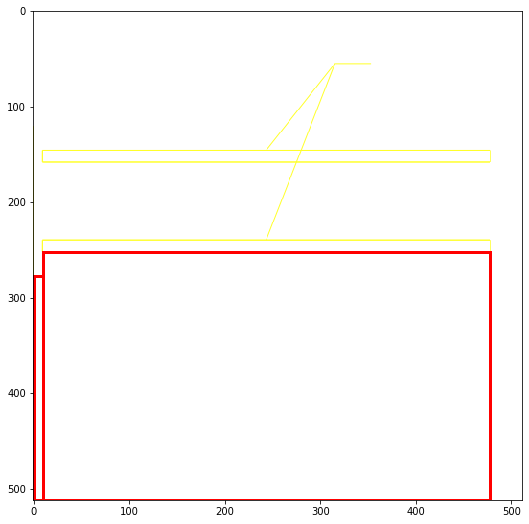

None

<Figure size 432x288 with 0 Axes>

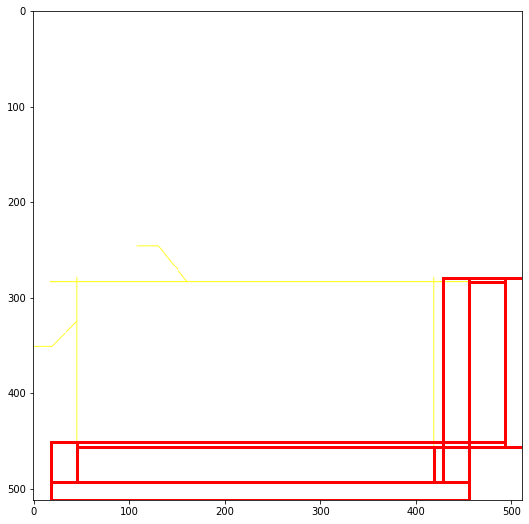

None

<Figure size 432x288 with 0 Axes>

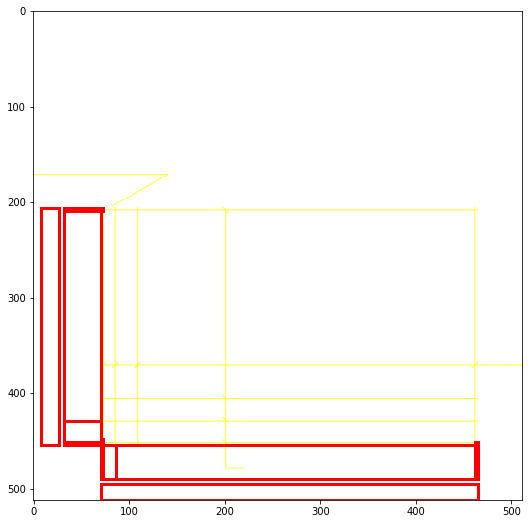

None

<Figure size 432x288 with 0 Axes>

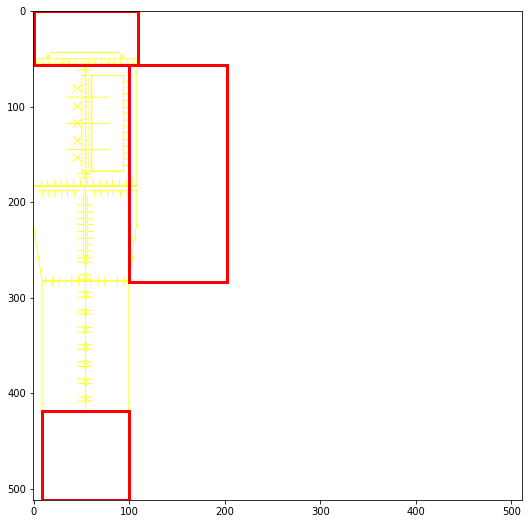

None

[1/5]-[0/113] [Losses: x 0.2096, y 0.2700, w 5.1727, h 4.1885, conf 3.7778, cls 0.0000, total 13.6186, recall: 0.139, precision: 0.002]
[1/5]-[1/113] [Losses: x 0.2238, y 0.2761, w 3.4614, h 2.2603, conf 3.5797, cls 0.0000, total 9.8014, recall: 0.089, precision: 0.001]
[1/5]-[2/113] [Losses: x 0.2329, y 0.2770, w 4.5503, h 6.9311, conf 3.6192, cls 0.0000, total 15.6104, recall: 0.150, precision: 0.003]
[1/5]-[3/113] [Losses: x 0.2705, y 0.2351, w 2.5531, h 3.3805, conf 3.4893, cls 0.0000, total 9.9285, recall: 0.118, precision: 0.001]
[1/5]-[4/113] [Losses: x 0.2166, y 0.2513, w 5.3837, h 2.7803, conf 3.2828, cls 0.0000, total 11.9148, recall: 0.158, precision: 0.001]
[1/5]-[5/113] [Losses: x 0.3322, y 0.2739, w 4.1166, h 7.4371, conf 3.9675, cls 0.0000, total 16.1273, recall: 0.095, precision: 0.000]
[1/5]-[6/113] [Losses: x 0.2893, y 0.2048, w 2.9373, h 2.4679, conf 3.8451, cls 0.0000, total 9.7445, recall: 0.286, precision: 0.008]
[1/5]-[7/113] [Losses: x 0.2518, y 0.2451, w 4.7202

<Figure size 432x288 with 0 Axes>

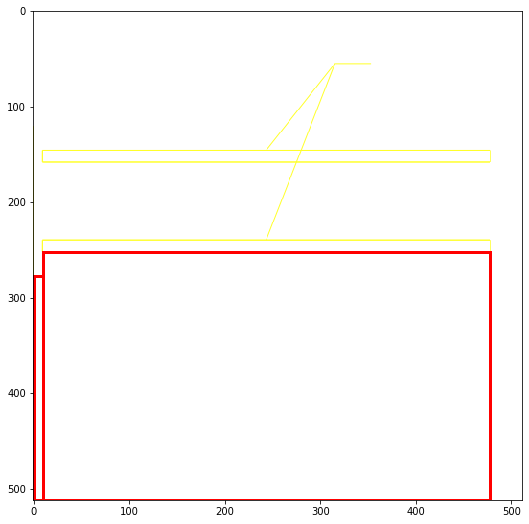

None

<Figure size 432x288 with 0 Axes>

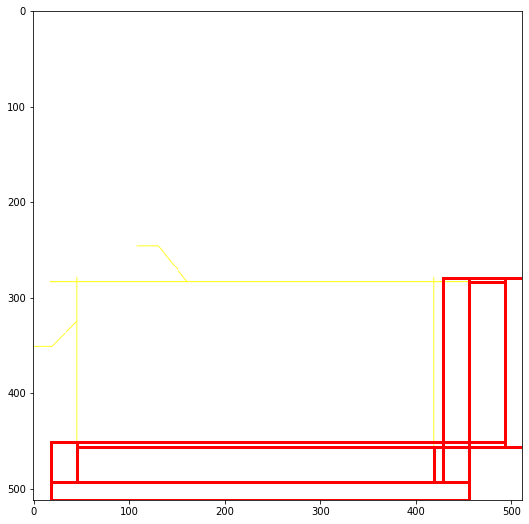

None

<Figure size 432x288 with 0 Axes>

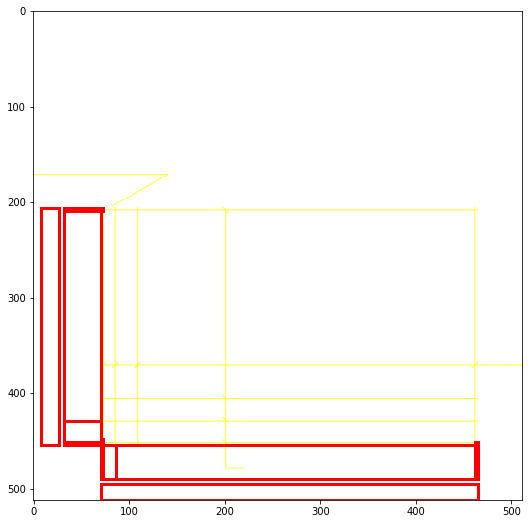

None

<Figure size 432x288 with 0 Axes>

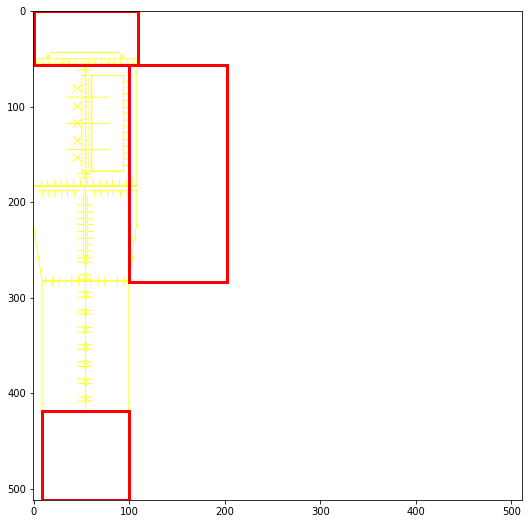

None

[2/5]-[0/113] [Losses: x 0.2020, y 0.2628, w 5.1927, h 4.4106, conf 3.8698, cls 0.0000, total 13.9379, recall: 0.181, precision: 0.001]
[2/5]-[1/113] [Losses: x 0.2310, y 0.2842, w 3.8184, h 2.5806, conf 3.6921, cls 0.0000, total 10.6063, recall: 0.100, precision: 0.001]
[2/5]-[2/113] [Losses: x 0.2349, y 0.2730, w 4.9393, h 7.5031, conf 3.6870, cls 0.0000, total 16.6373, recall: 0.158, precision: 0.002]
[2/5]-[3/113] [Losses: x 0.2665, y 0.2373, w 2.7349, h 3.3932, conf 3.5270, cls 0.0000, total 10.1589, recall: 0.204, precision: 0.001]
[2/5]-[4/113] [Losses: x 0.2089, y 0.2436, w 4.3391, h 2.0210, conf 3.4398, cls 0.0000, total 10.2524, recall: 0.263, precision: 0.001]
[2/5]-[5/113] [Losses: x 0.3233, y 0.3006, w 4.0921, h 9.2851, conf 3.9998, cls 0.0000, total 18.0009, recall: 0.095, precision: 0.000]
[2/5]-[6/113] [Losses: x 0.2839, y 0.2069, w 2.8354, h 2.4546, conf 3.7614, cls 0.0000, total 9.5422, recall: 0.291, precision: 0.009]
[2/5]-[7/113] [Losses: x 0.2486, y 0.2433, w 4.42

In [ ]:
run(use_cuda=True, batch_size=4, epochs=5)